In [451]:
#Name: Yeju Kim
#Student number: 110672346
#Class: CSCI1200 - 010
#Homework name: Checkpoint3_Yeju_Kim_CSCI1200
#Description: 
    #for the checkpoint 1, it shows code for getting input from a user: get_menu_choice() and a brief code for creating a menu system: main()
    #for the checkpoint 2, there are real codes for reading and cleaning data and utility functions for selecting data. 
    #for the checkpoint 3, plot the graphs.

In [452]:
## Helper functions for indexing the columns

In [453]:
# Import all libraries needed for the project.

import csv
import pandas as pd
import random
import math


In [454]:
%matplotlib inline


import matplotlib.pyplot as plt
import statistics

# You may add more imports as needed

# "BD" stands for "batting data" 
class BD:
    year = 0
    player_id = 1
    first_name = 2
    last_name = 3
    team_name = 4
    games = 5
    at_bats = 6
    runs = 7
    hits = 8
    doubles = 9
    triples = 10
    home_runs = 11
    rbi = 12
    walks = 13
    hbp = 14
    stolen_bases = 15
    caught_stealing = 16
    strike_outs = 17
    sac_flies = 18
    position = 19

In [455]:
def verify_baseball_data(data):
    """
    Verifies the structure and format of the baseball data:
        checks that all rows have the same number of columns
        checks that each column is the correct type (str for string columns, int for int columns)
        checks that it has the correct number of rows and the correct number of columns
    
    If your data is in the right format, you'll see the output:
        Rows: 74750
        Cols: 20
        Congrats! You have the correct shape of data!

    If you see something else, this will give you an indication of what is not right.

    Parameters:
    -----------
        data : list of lists
            From the baseball data (each sublist corresponds to a row from the input file)
    """
    rows = len(data)
    cols = len(data[0])

    # make sure all rows have the same number of columns
    same_number_columns = True
    i = 0
    while i < len(data):
        row = data[i]
        if len(row) != cols:
            same_number_columns = False
        i += 1

    if not same_number_columns:
        print("Some rows have a different number of columns!")

    # make sure each column is the correct type
    overall_type = True    
    str_cols = [BD.player_id, BD.first_name, BD.last_name, BD.team_name, BD.position]
    
    column = 0
    while column < cols:
        col_vals = get_column_values(data, column)
        correct_type = True
        j = 0
        while j < len(col_vals):
            val = col_vals[j]
            if ((column in str_cols) and type(val) is not str) or (column not in str_cols and type(val) is not int):
                correct_type = False
            j += 1

        if not correct_type:
            print("Column " + str(column) + " contains values that are not the right type!")
            print(col_vals[:10]) # print the first 10 values
            overall_type = False
        column += 1


    if overall_type and same_number_columns:
        print("Rows: " + str(rows))
        print("Cols: " + str(cols))

        if rows == 74750 and cols == 20:
            print("Congrats! You have the correct shape of data!")
        else:
            print("You have the incorrect shape of data!")
            print("You have # rows (should be 74750): " + str(rows))
            print("You have # columns (should be 20): " + str(cols))

Baseball Data Visualization Project
=============

Add more cells as needed! Make sure that your notebook runs without errors before turning it in for each checkpoint!

## Checkpoint 1

1. Code for getting input from a user: get_menu_choice()
2. Brief code for creating a menu system: main()

In [456]:
## 1.

#Make `get_menu_choice()` function to get user's input.
def get_menu_choice():
    #Define and prompt the menu for a user.
    menu = """
    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit"""
    
    choice = input(menu)
    
    #Define the valid input.
    valid_value = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]
    
    #While the choice is not in the Valid_value, 
    #re-prompt the menu and ask again to the user.
    while not choice in valid_value:
        print("Error: Invalid value")
        choice = input(menu)
        
    #If not, return the choice
    return choice

In [457]:
#Call the function

# get_menu_choice()

## Checkpoint 2

1. Real code for `read_data()` and `clean_data()` functions which read the batting data and modify it into a cleaned data.\
a. Read and open the file.\
b. Modify the values into proper types for every columns.\
c. Return and save the cleaned data.

2. Real code for utility functions to deal with lists of lists.\
a. `get_matching_rows()`\
b. `get_column_values()`\
c. `get_unique_values()`\
d. `get_unique_column_values`()

3. Real code for `main()` function which provide plotting UI for the user.\
a. Bring the clean_data using `read_data()` and `clean_data()` function.\
b. Check whether the data has been cleaned correctly, using `verify_baseball_data()` function.\
c. Get the user's input using `get_menu_choice()` function.\
d. Draw the plot which the user wants.\
e. Repeat b and c until the user enters '0'.

In [458]:
## 1a. 

#Define the code ‘read_data()’
def read_data():
    #Store the “battingData1950Present.csv” to a variable called ‘filename'.
    filename = "battingData1950Present.csv"
    
    #Open the file and set up a CSV reader
    file = open(filename, "r")
    reader = csv.reader(file)
    
    #The file has a header, so indicate the first line as the header 
    #and get the new_data except for the header.
    line_count = 0
    new_data = []
    header = []
    for line in reader:
        if line_count == 0:
            header = line
        else:
            new_data.append(line)
        line_count += 1
    
    #Close the file not to be changed.
    file.close()
    
    #Retern the header and data.
    return new_data, header


In [459]:
## 1b & 1c.

#Define the 'clean_data()' function.
#This code is for modifying the data into analyzable form.

def clean_data(new_data):
    cleaned_data = []
    
    #Convert every element into the proper type of value 
    #using nested lists and store it in ‘clean_data.’
    for row in new_data:
        line = []
        for i in row:
            if i.isnumeric():
                line.append(int(i))
            elif i == "":
                line.append(0)
            elif type(i) == str:
                line.append(i)
        #After converting a single row, append the ‘line’ in the list ‘clean_data’.
        cleaned_data.append(line)
        
    return cleaned_data

data = clean_data(read_data()[0])

In [460]:
## 2a.

#data is given in list of lists.
def get_matching_rows(data, column_index, target):
    matching_rows = []
    
    #For every line in data, if the element is the same as the target,
    #add it to ‘matching_rows.’
    #BD.column would be returning an index number by helper function
    for line in data:
        if line[column_index] == target:
            matching_rows.append(line)
            
    return matching_rows

In [461]:
#Exmaple in rubric:

#get_matching_rows with column_index of 1 (BD.player_id) 
#and target_val of "oswalro01" returns 
print(get_matching_rows(data, BD.player_id, "oswalro01"))

[[2001, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 28, 47, 3, 9, 1, 0, 0, 3, 1, 0, 0, 0, 12, 0, 'P'], [2002, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 35, 77, 5, 10, 2, 0, 0, 4, 4, 1, 0, 0, 26, 0, 'P'], [2003, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 21, 39, 4, 7, 1, 0, 0, 0, 2, 0, 0, 0, 15, 0, 'P'], [2004, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 36, 71, 1, 10, 1, 0, 0, 6, 3, 1, 0, 0, 16, 1, 'P'], [2005, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 35, 73, 1, 13, 0, 0, 0, 2, 2, 1, 0, 0, 19, 0, 'P'], [2006, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 35, 66, 3, 10, 1, 0, 1, 8, 4, 0, 0, 0, 15, 0, 'P'], [2007, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 33, 64, 2, 8, 1, 0, 0, 3, 3, 1, 0, 0, 21, 0, 'P'], [2008, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 32, 70, 3, 15, 0, 0, 0, 5, 0, 0, 0, 0, 18, 0, 'P'], [2009, 'oswalro01', 'Roy', 'Oswalt', 'Houston Astros', 30, 49, 4, 6, 0, 0, 0, 2, 2, 1, 0, 0, 8, 0, 'P'], [2010, 'oswalro01', 'Roy', 'Oswalt', 'Hou

In [462]:
## 2b.

def get_column_values(data, column_index):
    column_value = []
    
    #For every line in clean data, add all elements whose index is the same as the columns.
    #column would be an index number.
    for line in data:
        column_value.append(line[column_index])
        
    return column_value

In [463]:
#Exmaple in rubric:

# get_column_values with column_index of 4 (BD.team_name) returns a list with
# the first 5 values and last 5 values
print("First 5: \n", get_column_values(data, BD.team_name)[0:5])
print("Last 5: \n", get_column_values(data, BD.team_name)[-5:])

First 5: 
 ['Cleveland Indians', 'Brooklyn Dodgers', 'Cincinnati Reds', 'Cincinnati Reds', 'Chicago White Sox']
Last 5: 
 ['Milwaukee Brewers', 'New York Yankees', 'Tampa Bay Rays', 'Atlanta Braves', 'Cincinnati Reds']


In [464]:
## 2c.

def get_unique_values(List):
    #Change the list into a set to take unique values and return it to a list.
    return list(set(List))

In [465]:
#Exmaple in rubric:

#get_unique_values on the team_names returned by get_column_values
print(get_unique_values(get_column_values(data, BD.team_name)))

['Los Angeles Dodgers', 'Kansas City Athletics', 'Arizona Diamondbacks', 'Seattle Mariners', 'Boston Red Sox', 'Colorado Rockies', 'St. Louis Browns', 'San Francisco Giants', 'Montreal Expos', 'Minnesota Twins', 'Cincinnati Reds', 'Washington Senators', 'Philadelphia Athletics', 'Florida Marlins', 'Chicago Cubs', 'Detroit Tigers', 'Tampa Bay Rays', 'St. Louis Cardinals', 'New York Yankees', 'Washington Nationals', 'Anaheim Angels', 'Boston Braves', 'New York Giants', 'California Angels', 'Chicago White Sox', 'Cincinnati Redlegs', 'Toronto Blue Jays', 'Cleveland Indians', 'Pittsburgh Pirates', 'Seattle Pilots', 'Texas Rangers', 'Miami Marlins', 'Atlanta Braves', 'Los Angeles Angels of Anaheim', 'Philadelphia Phillies', 'Houston Astros', 'Baltimore Orioles', 'Kansas City Royals', 'San Diego Padres', 'Los Angeles Angels', 'Oakland Athletics', 'Brooklyn Dodgers', "Houston Colt .45's", 'Milwaukee Brewers', 'Milwaukee Braves', 'Tampa Bay Devil Rays', 'New York Mets']


In [466]:
## 2d.

def get_unique_column_values(data, column):
    #Call the ‘get_column_values()’ and ‘get_unique_values()’ functions.
    values = get_column_values(data, column)
    unique = get_unique_values(values)
    
    return unique

In [467]:
#Exmaple in rubric:

#get_unique_column_values with column_index of 0 (BD.year)
print(get_unique_column_values(data, BD.year))

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [468]:
## 3.

#Define the main() function.
def main():
    #Get the cleaned data.
    data = clean_data(read_data()[0])
    
    #Check whether the data has been cleaned correctly.
    verify_baseball_data(data)
    
    #Call the get_menu_choice() function 
    #and store the choice(= user’s input) in menu_choice.
    menu_choice = get_menu_choice()
    
    # While munu_choice is not 0, implement the selected option.
    while menu_choice != '0':
        if menu_choice == '1':
            #Draw the Line graph of games played for one player over time
            print("Result: the Line graph of games played for one player over time")
            graph_1()
        elif menu_choice == '2':
            #Draw the Line graph of games played for one player over time, separated by team
            print("Result: the Line graph of games played for one player over time, separated by team")
            graph_2()
        elif menu_choice == '3':
            #Draw the Histogram of runs scored for all players in one year (no cutoff)
            print("Result: the Histogram of runs scored for all players in one year (no cutoff)")
            graph_3()
        elif menu_choice == '4':
            #Draw the Histogram of runs scored for all players in one year (cutoff = 100)
            print("Result: the Histogram of runs scored for all players in one year (cutoff = 100)")
            graph_4()
        elif menu_choice == '5':
            #Draw the graph of team presence over time
            print("Result: the graph of team presence over time")
            graph_5()
        elif menu_choice == '6':
            #Draw the plot of home runs over time (percentiles)
            print("Result: the plot of home runs over time (percentiles)")
            graph_6()
        elif menu_choice == '7':
            #Draw the violin boxplot for the number of 
            #home runs, hits, walks, and strike-out of a selected team. (1950 - 2016)
            print("Result: the violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. (1950 - 2016)")
            graph_7()
        elif menu_choice == '8':
            #Draw the multi-bar plots that show the top 3 features 
            #among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing 
            #for every position, respectively.
            print("Result: the multi-bar plots that show the top 3 features among hits, doubles, triples, \home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.")
            graph_8()
            
            
        # If the previous process is completed, 
        #re-prompt the menu and ask for the user’s input again
        menu_choice = get_menu_choice()
    
    #Getting out of the while loop above means the user enters ‘0’, 
    #so return “Exit.”
    return "Exit"

# Checkpoint 3

1. Drawing the graphs.\
    a. Line graph of games played for one player over time\
    b. Line graph of games played for one player over time, separated based on team\
    c. Histogram of total runs scored for all players for a specific year\
    d. Histogram of runs scored for all players in a specific year (with a “minimum” cutoff)

In [469]:
## 1a.

#Define a function to sort the rows for a selected player_id.
def rows_for_player():
    
    #Make two options whether the user write the input directly or make the choice randomly.
    ask = "If you want to enter the player directly, enter '1', or want to choose randomly, enter '2'."
    choice = int(input(ask))
    
    #According the user's choice, store the selected player_id in the variable called "player".
    if choice == 1:
        player = input("Enter a player id.")
    elif choice == 2:
        player_list = get_unique_column_values(data, BD.player_id)
        player = random.choice(player_list)
    else:
        print("Error: Invalid value")
        choice = int(input(ask))
    
    #Select the matcing rows using 'get_matching_rows()' function and return it.
    matched_rows = get_matching_rows(data, BD.player_id, player)
    player_name = matched_rows[0][BD.first_name] + " " + matched_rows[0][BD.last_name]
    
    return player, player_name, matched_rows

In [470]:
# Define the function for plotting option 1.
def graph_1():
    
    #Call the selected player_id, player's name and the matching rows using 'row_for_player()' function.
    player, player_name, interest = rows_for_player()
    
    #Create 'year' list for x-axis and 'game' list for y-axis using 'get_column_values()' fucntion.
    year = get_column_values(interest, BD.year)
    game = get_column_values(interest, BD.games)
    
    #plot the line graph with blue line and circle markers.
    #Set the x and ylabels, and the title.
    plt.plot(year, game, "b-o")
    plt.xlabel("Year")
    plt.ylabel("Number of games")
    plt.title(f"Number of games played per year for {player_name}", fontweight = 'bold')
    
    #Save the plot as PDF file.
    plt.savefig("Graph_1.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    #Return the plot.
    return 

If you want to enter the player directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a player id. oswalro01


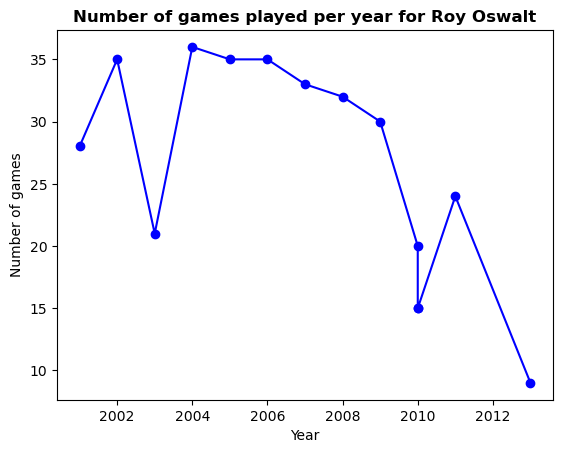

In [471]:
## Run the code.
graph_1()

#Example of input: oswalro01

In [472]:
## 1b.

#Define the function for plotting option 2.
def graph_2():
    #Call the selected player_id and the matching rows using 'row_for_player()' function.
    player, player_name, interest = rows_for_player()
    
    #Get all unique values of team_name in the interest.
    team = get_unique_column_values(interest, BD.team_name)

    #Use a for loop to make plots by every team name.
    #Set the empty lists named 'team_year' and 'team_game', then they will be x-axis and y-axis of line graph.
    for i in range(len(team)):
        team_year = []
        team_game = []
        
        #For each team, get the maching rows and append the values for year and game into team_year and team_game, respectivly.
        for j in range(len(get_matching_rows(interest, BD.team_name, team[i]))):
            team_year.append(get_matching_rows(interest, BD.team_name, team[i])[j][BD.year])
            team_game.append(get_matching_rows(interest, BD.team_name, team[i])[j][BD.games])
        
        #Plot the line graph with circle markers, and the label for each line would be the team name.
        plt.plot(team_year, team_game, "-o", label = f"{team[i]}")
    
    
    #Arrange the ticks of x-axis to show only an integer, not a flot.
    int_year = [row[BD.year] for row in interest]
    xint = range(math.floor(min(int_year)), math.ceil(max(int_year))+1)
    plt.xticks(xint)
    
    #Show the legend and set x and y labels and title for the graph.
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Number of games")
    plt.title(f"Number of games played per year for {player_name}", fontweight = 'bold')
    
    #Save the plot as PDF file.
    plt.savefig("Graph_2.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    #Return the plot.
    return


If you want to enter the player directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a player id. oswalro01


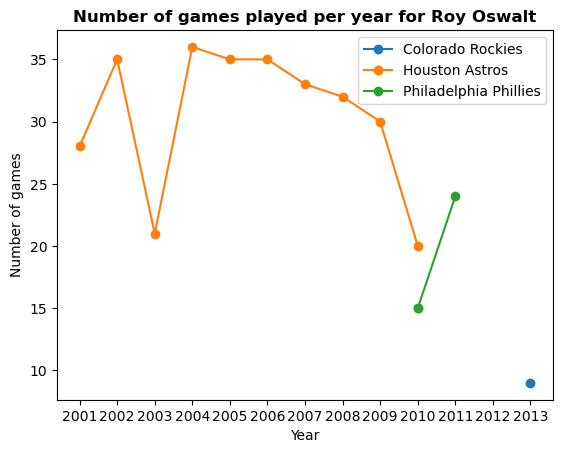

In [473]:
## Run the code.
graph_2()

#Example of input: oswalro01

In [474]:
## 1c.

#Define a function to sort the rows for a selected year.
def rows_for_year():
    
    #Make two options whether the user write the input directly or make a random input.
    ask = "If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'."
    choice = int(input(ask))
    
    #According the user's choice, store the selected year in the variable, "year".
    if choice == 1:
        year = int(input("Enter a year."))
    elif choice == 2:
        year_list = get_unique_column_values(data, BD.year)
        year = random.choice(year_list)
    else:
        print("Error: Invalid value")
        choice = int(input(ask))
    
    #Select the matcing rows using 'get_matching_rows()' function and return it.
    matched_rows = get_matching_rows(data, BD.year, year)
    
    return year, matched_rows

In [475]:
#Define the function for plotting option 3.
def graph_3():
    
    #Call the selected year and the matching rows using 'row_for_year()' function.
    year, interest = rows_for_year()
    
    #Get all unique values of player_id in the interest.
    unique_player = get_unique_column_values(interest, BD.player_id)
    
    #Use a for loop to sum the number of runs by players.
    #'run_sum' would be store all values of sum by player and be the x-axis for histrogram.
    run_sum = []
    
    #For every player, create 'run' list to store all runs elements 
    #and if the player_id is the same as a selected player_id, append the 'runs' value into the 'run' list.
    for i in unique_player:
        run = []
        for j in range(len(interest)):
            if interest[j][BD.player_id] == i:
                run.append(interest[j][BD.runs])
        
        #Append the sum of runs into 'run_sum'
        run_sum.append(sum(run))
    
    #Plot the histogram with a hundred bins and set the 'run_sum' as x-axis.
    #Set the title and x, y labels.
    plt.hist(run_sum, bins = 100, edgecolor = "w")
    plt.title(f"Total runs vs. number of players having that many runs ({year})")
    plt.xlabel("Number of total runs")
    plt.ylabel("Number of players")
    
    #Save the plot as PDF file.
    plt.savefig("Graph_3.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    
    #Return the plot.
    return

If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a year. 1982


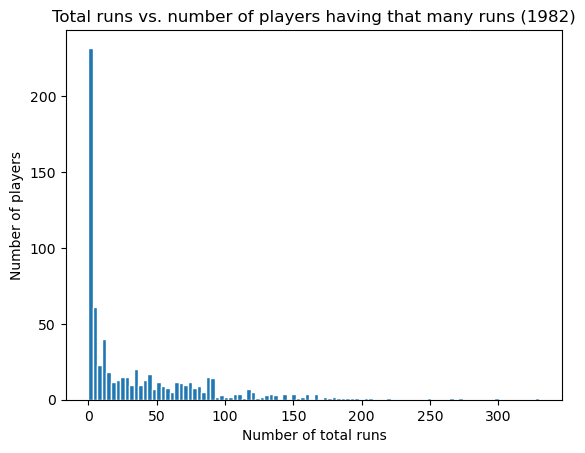

In [476]:
## Run the code.
graph_3()

#Example of input: ["year" : 1982]

In [477]:
## 1d. 

#Define the function for plotting option 4.
def graph_4():
    
    #Call the selected year and the matching rows using 'row_for_year()' function.
    #Then, ask the cutoff to user and convert the value into integer.
    year, interest = rows_for_year() 
    cutoff = int(input("Enter the minimun cut-off:"))
    
    #Get all unique values of player_id in the interest.
    unique_player = get_unique_column_values(interest, BD.player_id)
    
    #For every player, create 'run' list to store all runs elements 
    #and if the player_id is the same as a selected player_id, append the 'runs' value into the 'run' list.
    run_sum = []
    for i in unique_player:
        run = []
        for j in range(len(interest)):
            if interest[j][BD.player_id] == i:
                run.append(interest[j][BD.runs])
        
        #Append the sum of runs into 'run_sum'
        run_sum.append(sum(run))
    
    #Create a new list called 'cleared_run_sum' and it would be the x-axis for the plot.
    #Using a for loop, append the run_sum elements into 'cleared_run_sum' only when the value is bigger than the cutoff.
    cleared_run_sum = []
    for i in range(len(run_sum)):
        if run_sum[i] >= cutoff:
            cleared_run_sum.append(run_sum[i])
            
    #Plot the histogram with a hundred bins and set the 'cleared_run_sum' as x-axis.
    #Set the title and x, y labels.            
    plt.hist(cleared_run_sum, bins = 100, edgecolor = "w")
    plt.title(f"Total runs vs. number of players having that many runs ({year}, cutoff={cutoff})")
    plt.xlabel("Number of total runs")
    plt.ylabel("Number of players")
    
    #Save the plot as PDF file.
    plt.savefig("Graph_4.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    
    #Return the plot.
    return

If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a year. 1982
Enter the minimun cut-off: 10


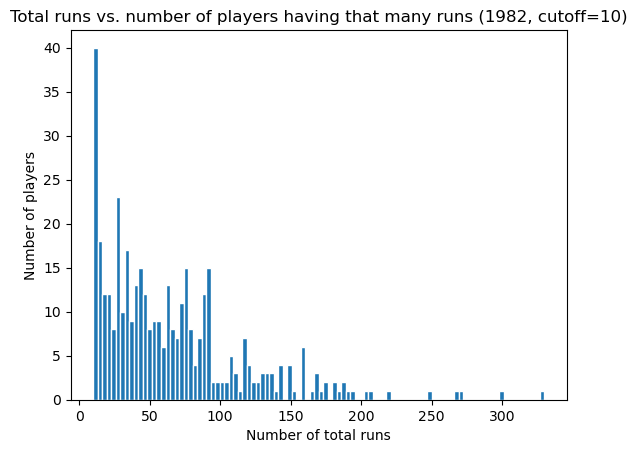

In [478]:
## Run the code.
graph_4()

#Example of input: ["year", "cutoff" : 1982, 10]

Rows: 74750
Cols: 20
Congrats! You have the correct shape of data!



    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 1


Result: the Line graph of games played for one player over time


If you want to enter the player directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a player id. smithre06


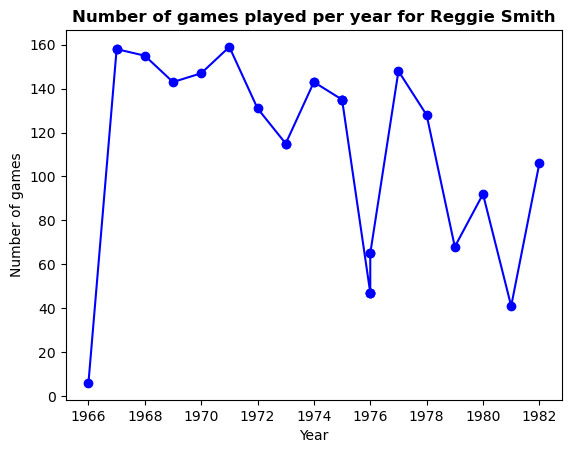


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 2


Result: the Line graph of games played for one player over time, separated by team


If you want to enter the player directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a player id. smithre06


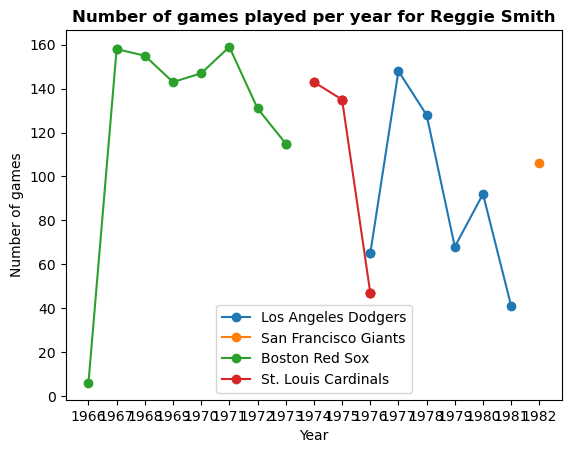


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 3


Result: the Histogram of runs scored for all players in one year (no cutoff)


If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a year. 2010


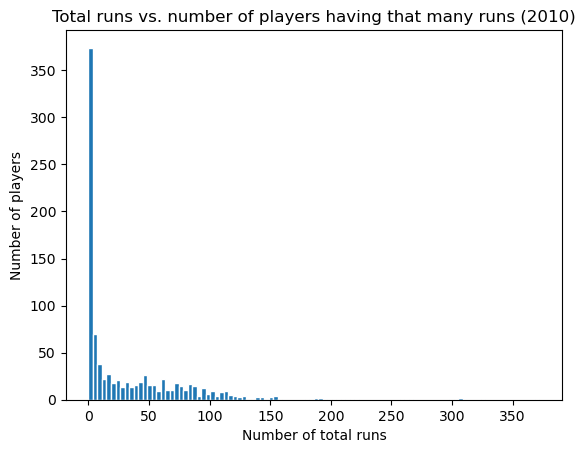


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 4


Result: the Histogram of runs scored for all players in one year (cutoff = 100)


If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'. 1
Enter a year. 2010
Enter the minimun cut-off: 10


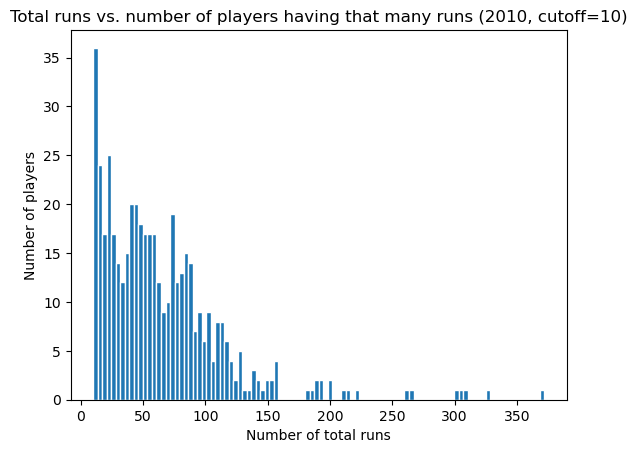


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 0


'Exit'

In [480]:
#Call the main() function.
main()

#Input in rubrics:
#option1, 2: smithre06
#option3, 4: 2010 (cutoff: 10)